# Итоговая работа.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

## Задание 1


Вычислите производную функции: 

$tg^2(sin(x) + cos(2x+3))$ 

в точке $x_0=1$


In [4]:
from sympy import *
x = Symbol('x')
f = tan(sin(x) + cos(2*x + 3))**2

In [6]:
# производная
f1 = f.diff(x)
f1

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [7]:
y = lambdify(x, f1)
print(f'Значение производной в точке x0=1: {y(1)}')

Значение производной в точке x0=1: 55.385917635337854


## Задание 2

Дан объект в $2D$ пространстве

(-200.0, 200.0)

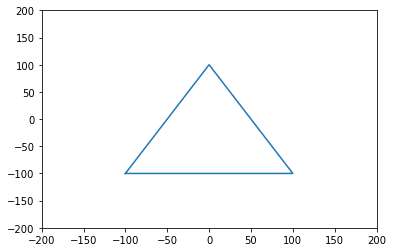

In [21]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)


(-200.0, 200.0)

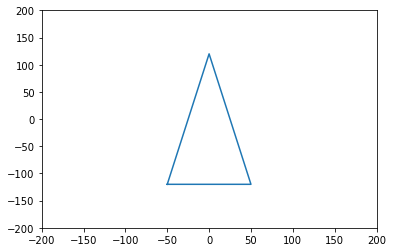

In [32]:
# Масштабирование
B = np.array([[0.5, 0, 0], [0, 1.2, 0], [0,0,0]])
res = B@A.transpose()
tt = res.transpose()
C = np.array(tt)

x = C[:,0]
y = C[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

(0.0, 400.0)

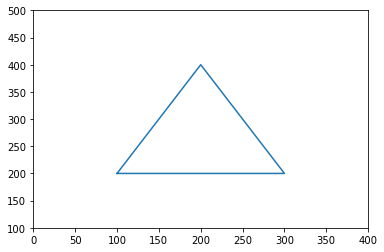

In [35]:
# Смещение
D = np.array([[200, 300, 0], [200, 300, 0], [200,300,0], [200,300,0]])
E = A + D

x = E[:,0]
y = E[:,1]
plt.plot(x, y)
plt.ylim([100, 500])
plt.xlim([0, 400]) 

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [36]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [37]:
w, v = np.linalg.eig(m)
print ("Собственные значения:", w)
print ("Собственные вектора:", v)

Собственные значения: [ 3. -1.]
Собственные вектора: [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`. 

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [101]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [102]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

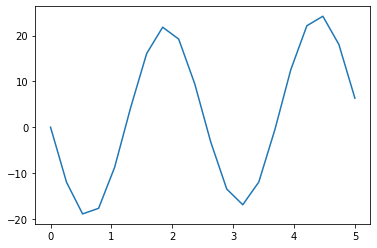

In [103]:
plt.plot(x, fx)
plt.show()

In [41]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [113]:
print(f"Параметры [a,b]: {minimize(error,  [0,0],  method='COBYLA')['x']}")

Параметры [a,b]: [ 3.00018796 -2.50008926]


## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [53]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [94]:
def cosine(a,b):
  alength = np.linalg.norm(a)
  blength = np.linalg.norm(b)
  return np.dot(a,b) / (alength * blength)

for x, value_1 in enumerate(raitings):
    best_score = -1
    best_y = -1
    for y, value_2 in enumerate(raitings):
        if cosine(value_1, value_2) >= best_score and x != y:
            best_y = y
            best_score = cosine(value_1, value_2)
    print(x, best_y)

0 8
1 4
2 9
3 9
4 8
5 9
6 3
7 5
8 0
9 2
